Apply transfer learning with pre-trained VGG16 model on assignment 3 and analyze the result. 

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/catsndogs.zip"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_path = "/content/training_set/training_set"
train_set = train_datagen.flow_from_directory(directory=train_path,target_size=(224, 224),batch_size=32,color_mode="rgb",class_mode = 'binary')
test_path = "/content/test_set/test_set"
test_set = train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=30,color_mode="rgb",class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


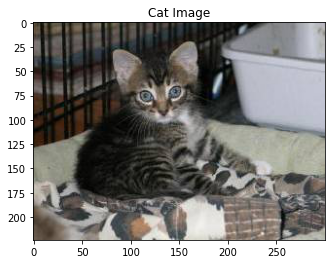

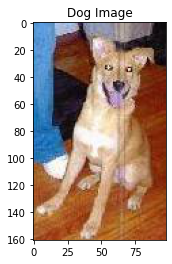

In [ ]:
img = load_img(train_path + "/cats/cat.12.jpg")
plt.imshow(img)
plt.title("Cat Image")
plt.show()

img = load_img(train_path + "/dogs/dog.12.jpg")
plt.imshow(img)
plt.title("Dog Image")
plt.show()

In [ ]:
# vgg16 model
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 2s 0us/step


# VGG16 - Adam

In [ ]:
model_adam_vgg16 = Sequential()
model_adam_vgg16.add(vgg16)
model_adam_vgg16.add(GlobalAveragePooling2D())
model_adam_vgg16.add(Dropout(0.2))
model_adam_vgg16.add(Dense(100, activation='relu'))
model_adam_vgg16.add(Dense(1, activation='sigmoid'))
model_adam_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,766,089
Trainable params: 14,766,089
Non-trainable params: 0
____________________________________________

In [ ]:
adam = Adam()

In [ ]:
model_adam_vgg16.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_adam_vgg16 = model_adam_vgg16.fit(train_set, validation_data = test_set, epochs = 5)

Epoch 1/5
251/251 [==============================] - 170s 616ms/step - loss: 0.8552 - accuracy: 0.4903 - val_loss: 0.6923 - val_accuracy: 0.5003
Epoch 2/5
251/251 [==============================] - 152s 605ms/step - loss: 0.6791 - accuracy: 0.5669 - val_loss: 0.6690 - val_accuracy: 0.6280
Epoch 3/5
251/251 [==============================] - 152s 607ms/step - loss: 0.6327 - accuracy: 0.6452 - val_loss: 0.6628 - val_accuracy: 0.6527
Epoch 4/5
251/251 [==============================] - 149s 594ms/step - loss: 0.7221 - accuracy: 0.5423 - val_loss: 0.6934 - val_accuracy: 0.4997
Epoch 5/5
251/251 [==============================] - 148s 590ms/step - loss: 0.6940 - accuracy: 0.4977 - val_loss: 0.6924 - val_accuracy: 0.5934


Text(0, 0.5, 'Accuracy')

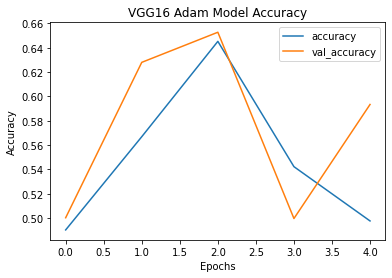

In [ ]:
plt.plot(history_adam_vgg16.history['accuracy'], label='accuracy')
plt.plot(history_adam_vgg16.history['val_accuracy'], label='val_accuracy')
plt.title("VGG16 Adam Model Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Resnet 50 - Adam

In [ ]:
# resnet 50
resnet50= tensorflow.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in resnet50.layers:
        layer.trainable=False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model_adam_r50 = Sequential()
model_adam_r50.add(resnet50)
model_adam_r50.add(Flatten())
model_adam_r50.add(Dense(100, activation='relu'))
model_adam_r50.add(Dense(1, activation='sigmoid'))
model_adam_r50.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,792,713
Trainable params: 205,001
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_adam_r50.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_adam_r50 = model_adam_r50.fit(train_set, validation_data = test_set, epochs = 5)

Epoch 1/5
251/251 [==============================] - 77s 292ms/step - loss: 0.6708 - accuracy: 0.5996 - val_loss: 0.6411 - val_accuracy: 0.6389
Epoch 2/5
251/251 [==============================] - 70s 281ms/step - loss: 0.6452 - accuracy: 0.6292 - val_loss: 0.6339 - val_accuracy: 0.6371
Epoch 3/5
251/251 [==============================] - 71s 282ms/step - loss: 0.6355 - accuracy: 0.6403 - val_loss: 0.6392 - val_accuracy: 0.6290
Epoch 4/5
251/251 [==============================] - 70s 279ms/step - loss: 0.6321 - accuracy: 0.6427 - val_loss: 0.6201 - val_accuracy: 0.6610
Epoch 5/5
251/251 [==============================] - 70s 281ms/step - loss: 0.6283 - accuracy: 0.6493 - val_loss: 0.6180 - val_accuracy: 0.6595


Text(0, 0.5, 'Accuracy')

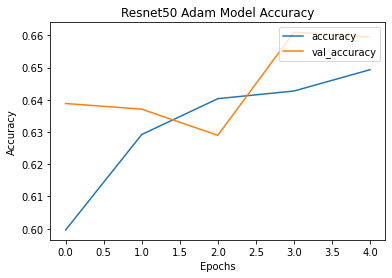

In [ ]:
plt.plot(history_adam_r50.history['accuracy'], label='accuracy')
plt.plot(history_adam_r50.history['val_accuracy'], label='val_accuracy')
plt.title("Resnet50 Adam Model Accuracy")
plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")